<a href="https://colab.research.google.com/github/fangyiyu/Data_Visualization/blob/master/DDS_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving nyt1.csv to nyt1.csv


In [2]:
import pandas as pd
df = pd.read_csv("nyt1.csv")
df.shape

(458441, 5)

In [3]:
# Gender 0 is female, and 1 is male.
df.head()

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1


In [5]:
df.describe()

,Age,Gender,Impressions,Clicks,Signed_In
count,458441.000000,458441.000000,458441.000000,458441.000000,458441.000000
mean,29.482551,0.367037,5.007316,0.092594,0.700930
std,23.607034,0.481997,2.239349,0.309973,0.457851
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,0.000000
50%,31.000000,0.000000,5.000000,0.000000,1.000000
75%,48.000000,1.000000,6.000000,0.000000,1.000000
max,108.000000,1.000000,20.000000,4.000000,1.000000


In [4]:
# Create a new variable 'age_group' to categorize users by age
bins = [0, 18, 25, 35, 45, 55, 65, 110]
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['age_group'] = pd.cut(df.Age, bins, labels = labels,include_lowest = True)

In [5]:
df.head()

,Age,Gender,Impressions,Clicks,Signed_In,age_group
0,36,0,3,0,1,35-44
1,73,1,3,0,1,65+
2,30,0,3,0,1,25-34
3,49,1,3,0,1,45-54
4,47,1,11,0,1,45-54


In [6]:
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
# Set default theme and figure size
sns.set_theme()
sns.set(rc={'figure.figsize':(20,10)})

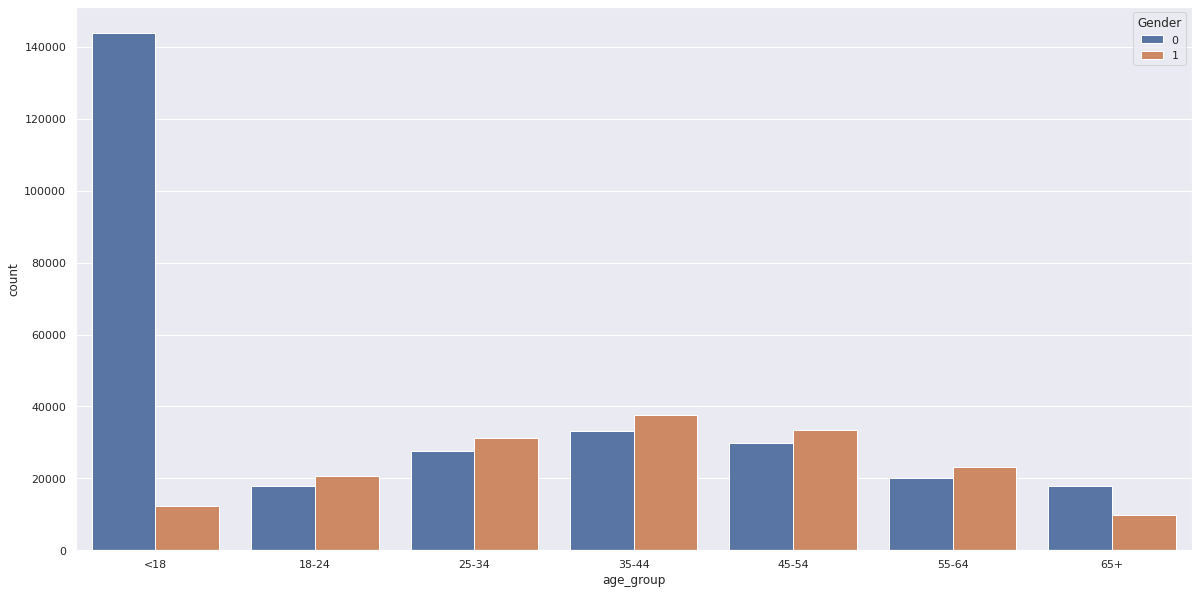

In [8]:
# How many people in each age group 
sns.countplot(x='age_group', hue='Gender', data=df)

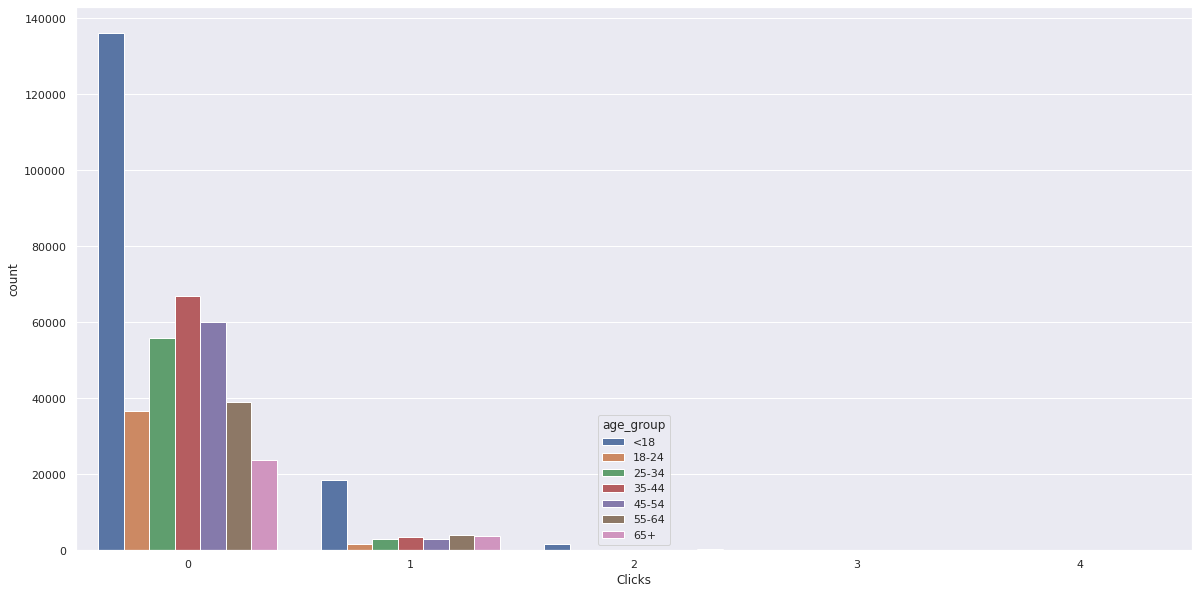

In [9]:
# which group has more clicks among the age groups
sns.countplot(x='Clicks', hue='age_group', data=df)

In [10]:
# Will anyone click on an ad where there is no impression?
df[(df['Clicks']>0) & (df['Impressions']==0)].shape[0]

0

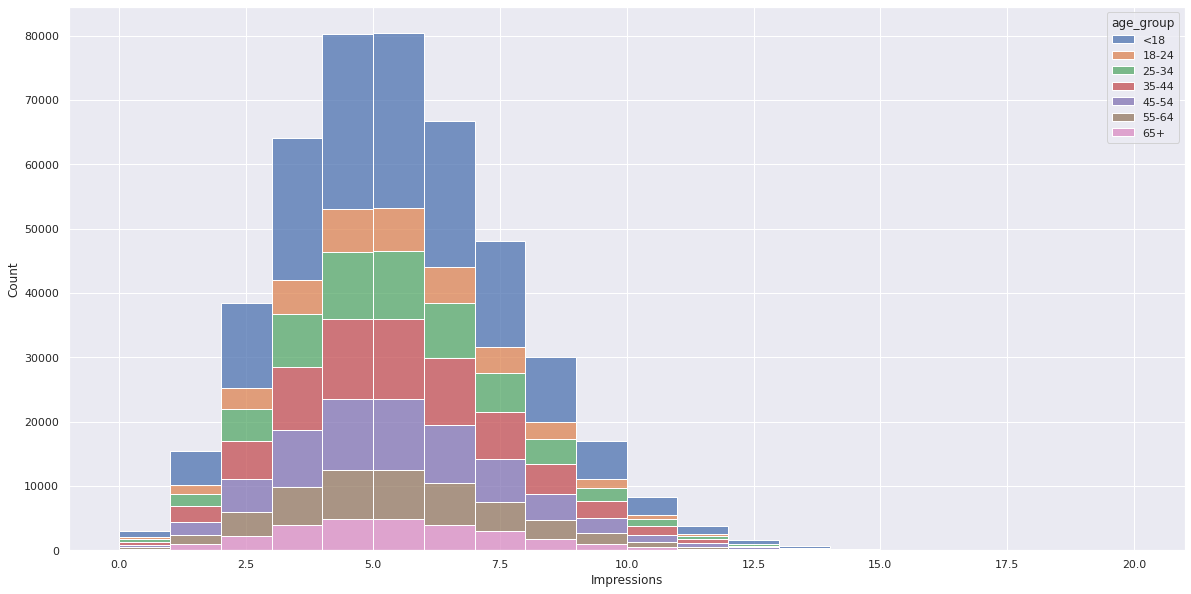

In [11]:
# The distribution of the impressions by age group
sns.histplot(df, x='Impressions', hue='age_group', stat='count', binwidth=1, multiple='stack')

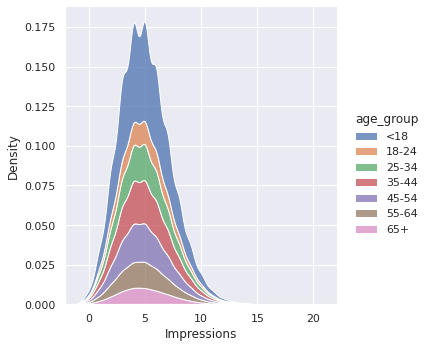

In [12]:
# Use kernel density estimation to see the above distribution
sns.displot(df, x='Impressions', hue='age_group', kind='kde', bw_adjust=2, multiple='stack')

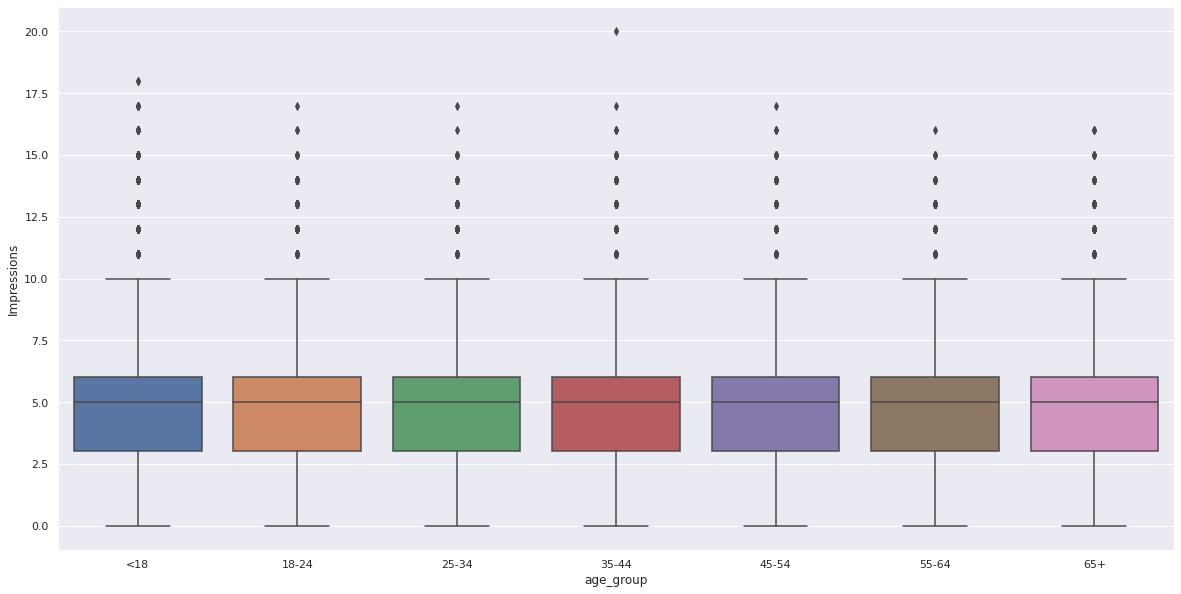

In [13]:
# Any outliers?
sns.boxplot(y=df['Impressions'], x=df['age_group'])

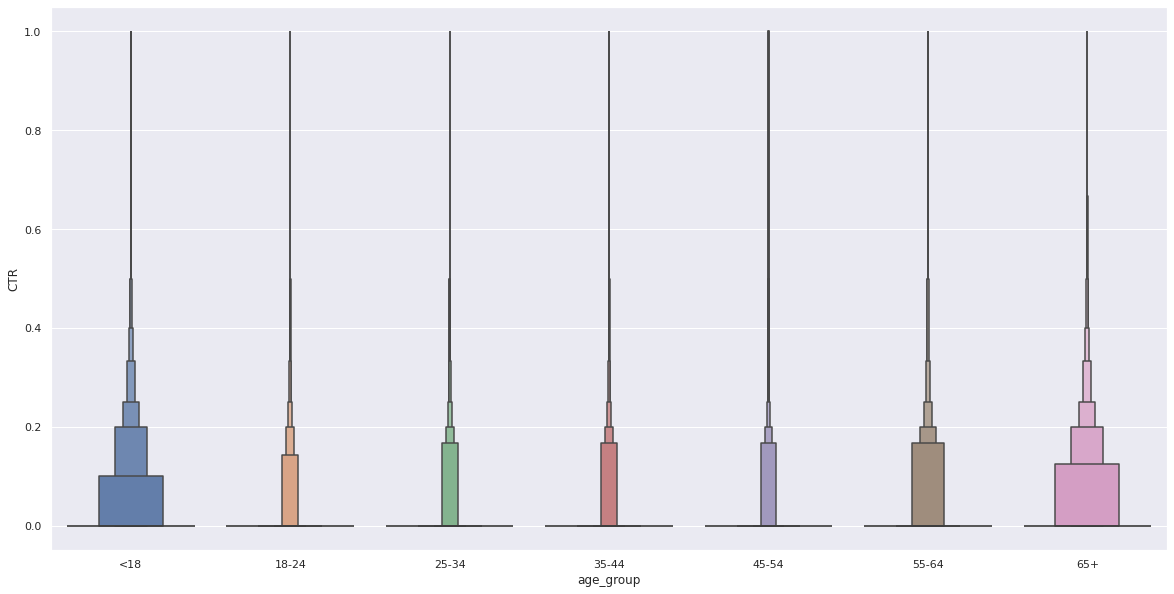

In [14]:
df['CTR'] = round(df['Clicks']/df['Impressions'], 5)
# Plot the distribution of Click-through rate by age group
sns.boxenplot(x=df['age_group'], y=df['CTR'])

In [15]:
bins = [-1, 0, 0.1, 0.2, 0.4, 1]
labels = ['0', '<10%', '10%-20%', '20%-40%', '>40%']
df['CTR_group'] = pd.cut(df.CTR, bins, labels = labels,include_lowest = True)
df.CTR_group.value_counts(normalize=True, sort=True)

0          0.912516
10%-20%    0.054654
20%-40%    0.023328
<10%       0.004996
>40%       0.004506
Name: CTR_group, dtype: float64

In [16]:
df_Clicked = df[df['CTR'] > 0]
df_Clicked.head()
df_Clicked.shape

(39838, 8)

In [17]:
df_Clicked.age_group.value_counts(normalize=True)

<18      0.505723
55-64    0.106757
65+      0.099152
35-44    0.090190
45-54    0.079397
25-34    0.073297
18-24    0.045484
Name: age_group, dtype: float64

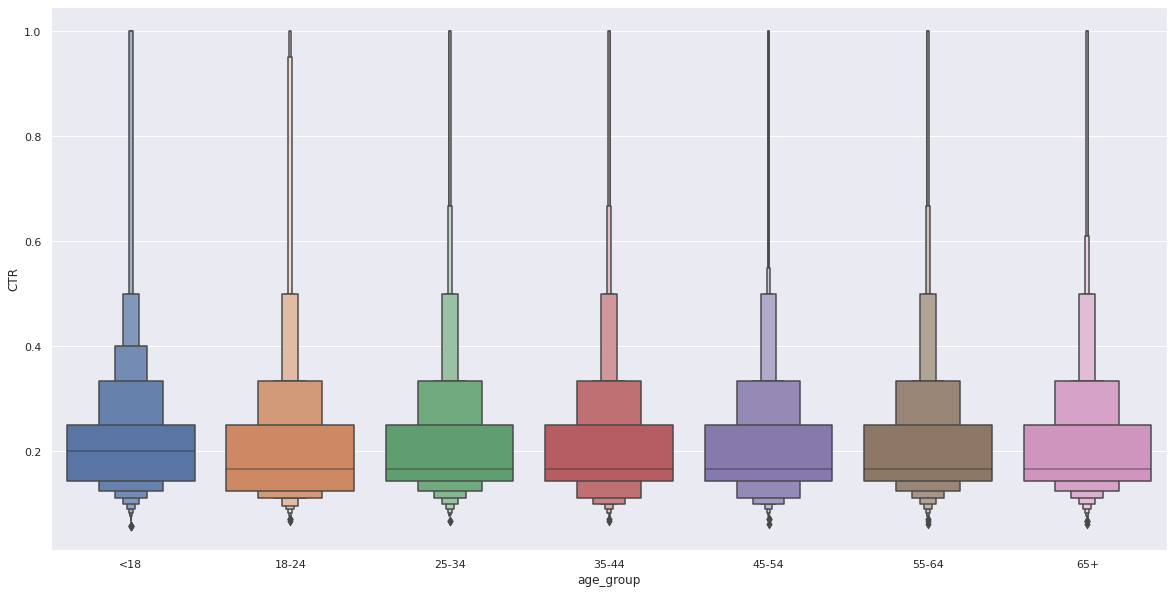

In [18]:
sns.boxenplot(x=df_Clicked['age_group'], y=df_Clicked['CTR'])

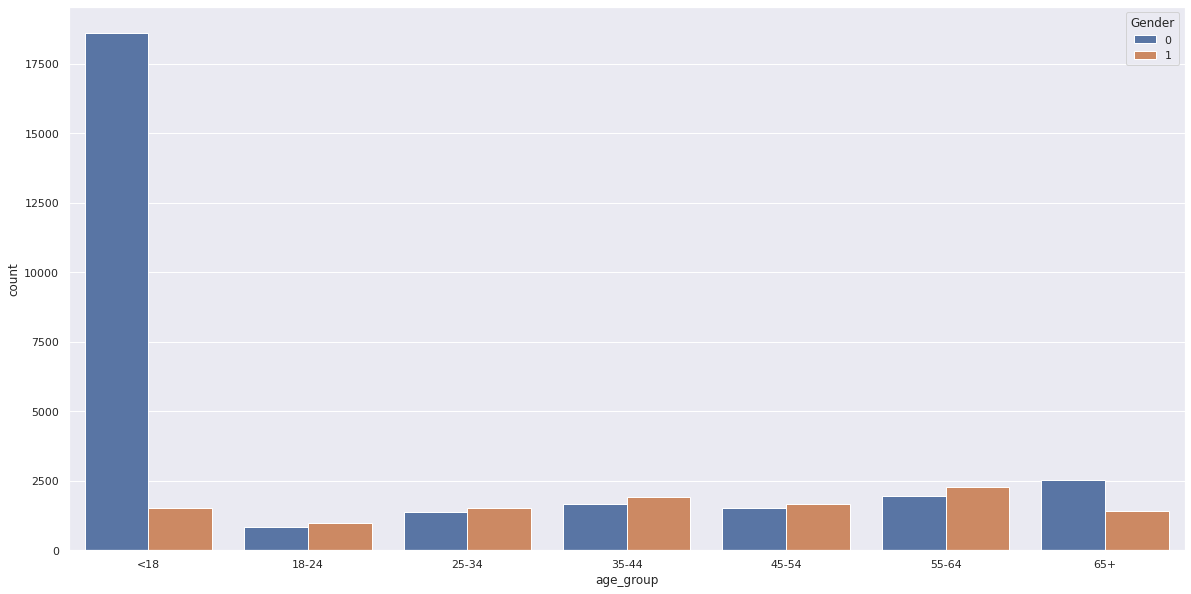

In [19]:
# Number of people in each age group among clicked users by gender
sns.countplot(x='age_group', hue='Gender', data=df_Clicked)

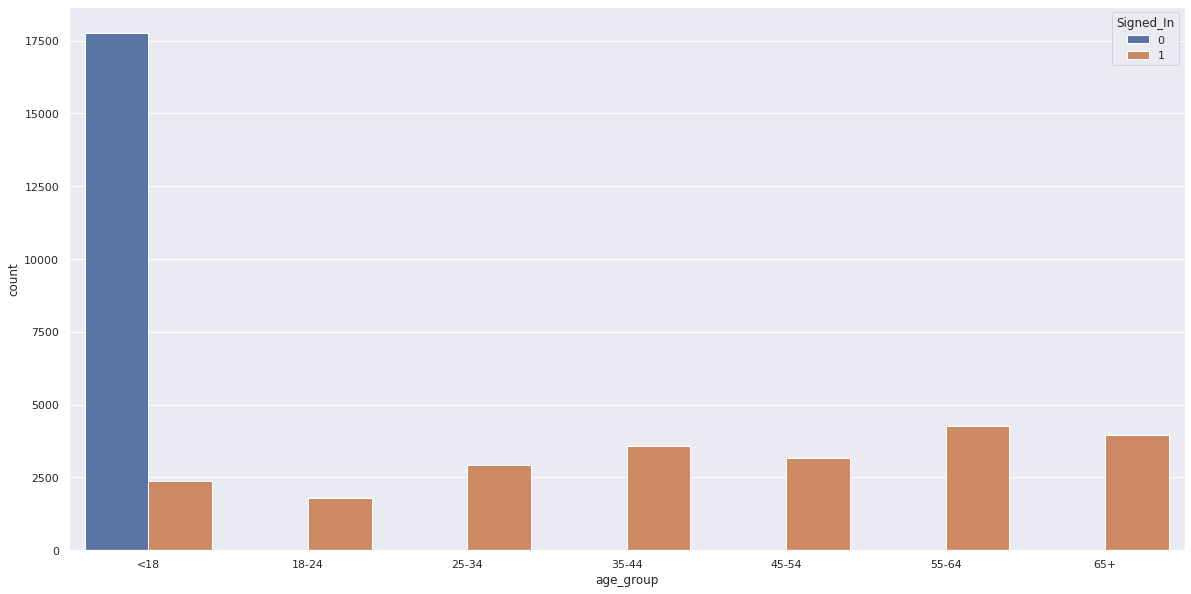

In [20]:
# Number of people in each age group among clicked users by sign_in status
sns.countplot(x='age_group', hue='Signed_In', data=df_Clicked)

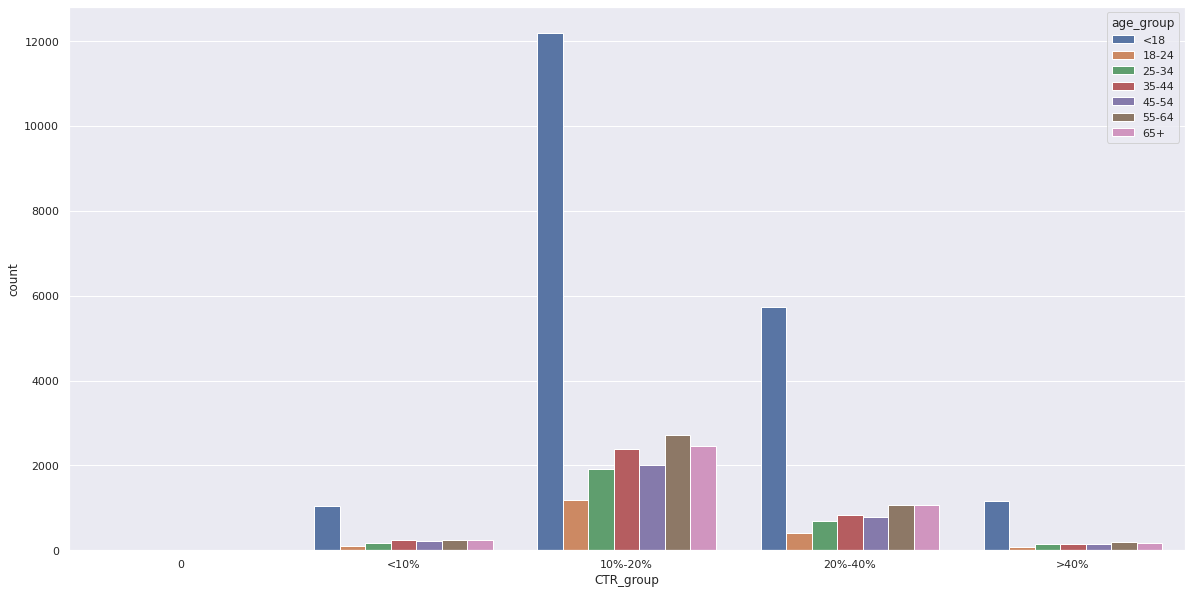

In [21]:
# Distribution of age_group in CTR groups
sns.countplot(x='CTR_group', hue='age_group', data=df_Clicked)

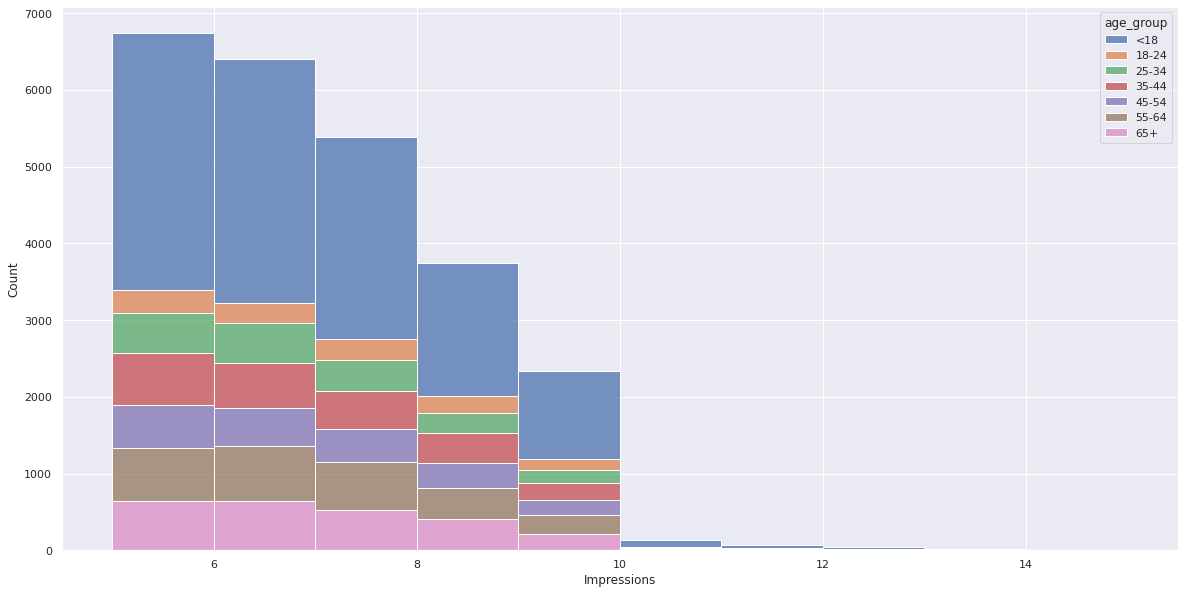

In [22]:
df_Clicked1020 = df_Clicked[df_Clicked['CTR_group'] == '10%-20%']
# Plot the distribution of impressions by age group 
sns.histplot(df_Clicked1020, x='Impressions', hue='age_group', binwidth=1, stat='count', multiple='stack')

In [23]:
df_Clicked1020.age_group.value_counts(normalize=True)

<18      0.490236
55-64    0.109571
65+      0.098682
35-44    0.095709
45-54    0.080963
25-34    0.076744
18-24    0.048095
Name: age_group, dtype: float64

In [24]:
df_Clicked1020.Gender.value_counts(normalize=True)

0    0.706485
1    0.293515
Name: Gender, dtype: float64

In [25]:
df_Clicked1020.Signed_In.value_counts(normalize=True)

1    0.568266
0    0.431734
Name: Signed_In, dtype: float64